In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.animation
import geopandas as gpd
import sklearn
from sklearn import mixture
from sklearn.neighbors import KernelDensity
pd.set_option('display.max_columns', None)
%matplotlib inline

In [203]:
df = pd.read_csv('data/Global_Landslide_Catalog_Export.csv')
df['event_date'] = pd.to_datetime(df['event_date'])
df['month'] = df['event_date'].dt.month
df['year'] = df['event_date'].dt.year


In [204]:
df.sample(10)

,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,landslide_trigger,landslide_size,landslide_setting,fatality_count,injury_count,storm_name,photo_link,notes,event_import_source,event_import_id,country_name,country_code,admin_division_name,admin_division_population,gazeteer_closest_point,gazeteer_distance,submitted_date,created_date,last_edited_date,longitude,latitude,month,year
2481,TopCrashVideos,http://topcrashvideos.com/dji-phantom-3-drone-...,9576,2016-04-24 05:00:00,NaN,"Bournemouth, Dorset, UK",Dramatic aerial drone video showing extent of ...,"Bournemouth, Dorset, UK",exact,landslide,rain,medium,bluff,0.0,0.0,NaN,NaN,NaN,glc,9576.0,United Kingdom,GB,England,163600.0,Bournemouth,1.06309,10/11/2016 07:43:00 PM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-1.864900,50.718100,4,2016
1700,Thaindian News,http://www.thaindian.com/newsportal/uncategori...,1091,2009-08-16 09:00:00,NaN,"Kalimpong, Darjeeling, West Bengal","Landslide killed, occurred at various places, ...","Kalimpong, Darjeeling, West Bengal",25km,landslide,downpour,medium,above_river,2.0,NaN,NaN,NaN,NaN,glc,1091.0,India,IN,Bengal,43000.0,Kālimpang,1.39876,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,88.438496,27.024598,8,2009
3181,thestar.com,http://thestar.com.my/metro/story.asp?file=/20...,846,2008-10-15 00:00:00,NaN,"Pinggir Bukit Segar, Cheras",landslide occurred in 5pm,"Pinggir Bukit Segar, Cheras",10km,complex,downpour,medium,unknown,NaN,NaN,NaN,NaN,NaN,glc,846.0,Malaysia,MY,Selangor,69302.0,Kampong Baharu Balakong,6.82239,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,101.746000,3.094900,10,2008
5682,Malaysian Digest,http://www.malaysiandigest.com/news/530755-lan...,6412,2014-12-01 20:00:00,NaN,Jalan Kuala Slim at Km 6.4,Jalan Kuala Slim leading to Felda Besout and a...,Jalan Kuala Slim at Km 6.4,25km,landslide,unknown,medium,above_road,0.0,0.0,NaN,http://328744392.r.worldcdn.net/images/stories...,NaN,glc,6412.0,Malaysia,MY,Perak,30016.0,Bidur,34.01166,12/03/2014 10:30:00 PM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,101.383000,3.825800,12,2014
4896,CBS,http://losangeles.cbslocal.com/2013/10/09/seve...,5595,2013-10-09 14:30:00,NaN,"Sun Valley, Ca","Interstate 5 northbound near Burbank, Californ...","Sun Valley, Ca",1km,mudslide,downpour,medium,urban,0.0,NaN,NaN,http://cbsla.files.wordpress.com/2013/10/img_3...,NaN,glc,5595.0,United States,US,California,77848.0,North Hollywood,5.63746,08/14/2015 07:54:00 PM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-118.366600,34.222000,10,2013
7778,king5,http://www.king5.com/news/local/Heavy-rains--8...,1394,2010-01-11 00:00:00,NaN,"Highway 101 near Lilliwaup in Mason County, WA",Debris from a mudslide on Highway 101 near Lil...,"Highway 101 near Lilliwaup in Mason County, WA",10km,mudslide,downpour,small,unknown,NaN,NaN,NaN,NaN,NaN,glc,1394.0,United States,US,Washington,3931.0,Belfair,20.34310,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-123.095700,47.469700,1,2010
5904,Fox 8 WWCP,http://www.fox8tv.com/News/NewsDetails.asp?New...,6957,2015-06-16 00:00:00,NaN,"Route 56, Johnston, PA next to Point Stadium",The road was closed last week after a portion ...,"Route 56, Johnston, PA next to Point Stadium",1km,landslide,continuous_rain,small,above_road,0.0,0.0,NaN,http://bloximages.chicago2.vip.townnews.com/tr...,NaN,glc,6957.0,United States,US,Pennsylvania,20978.0,Johnstown,0.59899,06/20/2016 06:00:00 PM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-78.926100,40.331600,6,2015
2089,ABS CBN News.com,http://news.abs-cbn.com/nation/regions/01/11/1...,5758,2014-01-10 18:00:00,NaN,Jose Rosales Ave Butuan City,Rains trigger landslide in Agusan del Norte By...,Jose Rosales Ave Butuan City,1km,landslide,tropical_cyclone,medium,above_road,0.0,0.0,Agaton,NaN,NaN,glc,5758.0,Philippines,PH,Caraga,309709.0,Butuan,1.33719,08/24/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/

In [234]:
df.landslide_size.value_counts()

medium          6551
small           2767
unknown          851
large            750
very_large       102
catastrophic       3
Name: landslide_size, dtype: int64

In [205]:
df.country_code.value_counts()

US    2992
IN    1265
PH     675
NP     481
CN     426
      ... 
JO       1
GU       1
SI       1
ME       1
AE       1
Name: country_code, Length: 139, dtype: int64

In [257]:
df.query('admin_division_name=="Columbia"')

,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,landslide_trigger,landslide_size,landslide_setting,fatality_count,injury_count,storm_name,photo_link,notes,event_import_source,event_import_id,country_name,country_code,admin_division_name,admin_division_population,gazeteer_closest_point,gazeteer_distance,submitted_date,created_date,last_edited_date,longitude,latitude,month,year


In [206]:
df_us = df[(df.country_code == 'US')]
df_us = df_us.query("admin_division_name in ['California','Oregon', 'Washington']")
#df_us = df_us[df_us.year != 2010]
#df_us = df_us[df_us.year != 2011]

# #plot the number of landslides per year with color representing the month
# for month in range(1, 13):
#     fig, ax = plt.subplots(figsize=(10, 6))
#     df_month = df_us[df_us.month == month]
#     num_landslides = df_month.groupby('year').size()
#     ax.plot(num_landslides.index, num_landslides.values, 'o-', label=month)
#     ax.legend(title='Month'+':'+ str(month))
#     ax.set_ylim(0,100)
# #ax.set_yscale('log')

In [207]:
df_us.admin_division_name.value_counts()
# df_us.to_csv('data/df_us.csv', index = False, header=True)

Oregon        948
Washington    407
California    400
Name: admin_division_name, dtype: int64

In [235]:
df_us.landslide_size.value_counts()

unknown    764
small      480
medium     478
large       33
Name: landslide_size, dtype: int64

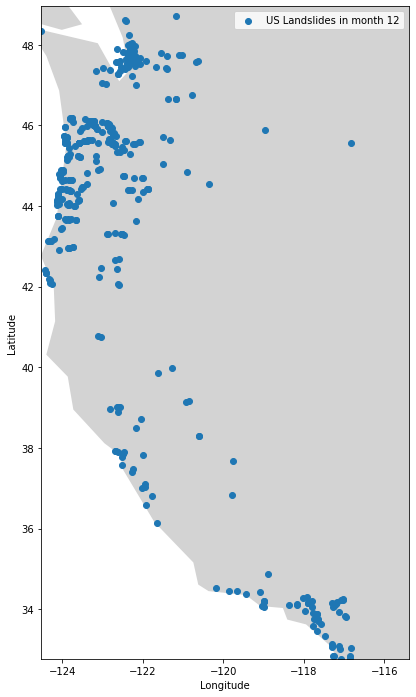

In [208]:

#worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_cities"))
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Creating axes and plotting world map
#fig = plt.figure(figsize=(10, 10))
fig,  ax =  plt.subplots( figsize = (12,12))
worldmap.plot(color="lightgrey", ax=ax)
#worldmap.plot(color="lightgrey")

sc = ax.scatter([], [])


min_lon, min_lat, max_lon, max_lat = df_us['longitude'].min(), df_us['latitude'].min(), df_us['longitude'].max(), df_us['latitude'].max()
ax.set_xlim(min_lon, max_lon)
ax.set_ylim(min_lat, max_lat)
#plt.xlim([-125, -70])
#plt.ylim([30, 50])

plt.xlabel("Longitude")
plt.ylabel("Latitude")

def animate(i):

    df_tmp = df_us[(df_us.month == i)]
    x = df_tmp['longitude']
    y = df_tmp['latitude']
    sc.set_offsets(np.c_[x,y])
    ax.legend([f"US Landslides in month {i}"])
    #ax.legend()
ani = matplotlib.animation.FuncAnimation(fig, animate, 
                frames=13, interval=1000, repeat=True) 


ani.save('./plots/test.gif', writer='imagemagick', fps=2)
plt.show()

/Users/s.bykov/opt/anaconda3/envs/venv_ml/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/s.bykov/opt/anaconda3/envs/venv_ml/lib/python3.9/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/Users/s.bykov/opt/anaconda3/envs/venv_ml/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/s.bykov/opt/anaconda3/envs/venv_ml/lib

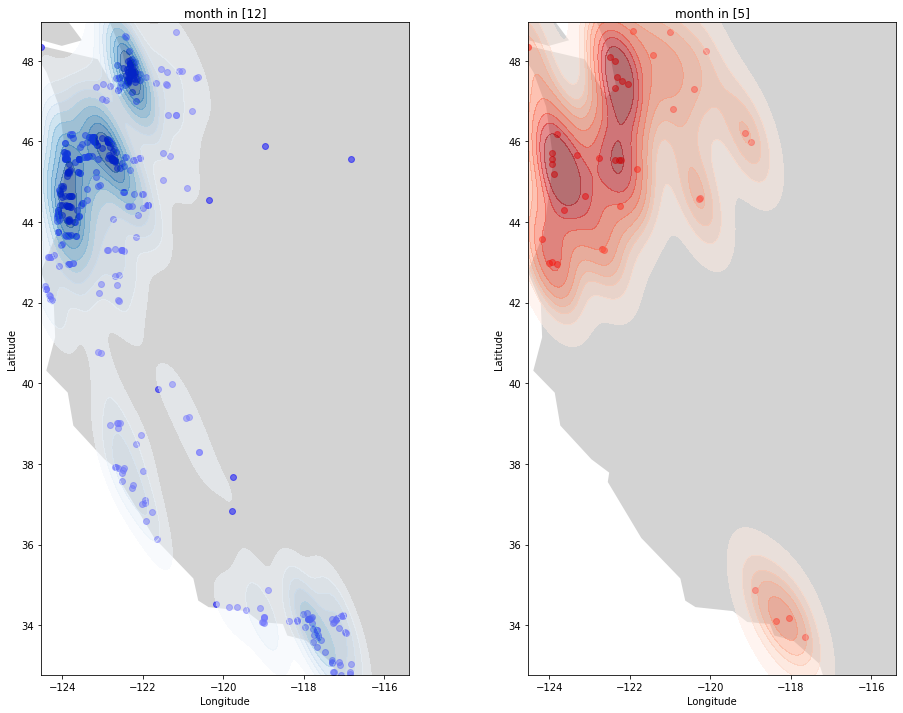

In [209]:
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

def plot_selection(ax, query="month in [12,1,2]", color='b', cmap = 'Blues', plot_earth = True):

    if plot_earth:

        worldmap.plot(color="lightgrey", ax=ax)

    #ax.set_xlim([-125, -70])
    #ax.set_ylim([30, 50])
    ax.set_xlim(min_lon, max_lon)
    ax.set_ylim(min_lat, max_lat)
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")

    df_us_select = df_us.query(query)
    x = df_us_select['longitude']
    y = df_us_select['latitude']
    ax.scatter(x, y, color=color, alpha=0.5)
    ax.set_title(query)
    sns.kdeplot(x, y, shade=True, shade_lowest=False, cmap=cmap, alpha=0.5, ax = ax, bw_adjust = 0.5)

    return x,y

fig, axs =  plt.subplots(nrows=1, ncols = 2, sharex = True, gridspec_kw = {'hspace':0, 'height_ratios': None}, figsize = (16,12))

x,y = plot_selection(axs[0], query="month in [12]", color='b')
x,y = plot_selection(axs[1], query="month in [5]", color='r', cmap = 'Reds', plot_earth = True)

In [256]:
df_us.year.value_counts().sort_index()

1996      2
1997      9
1998     12
2003      1
2005      2
2006     11
2007     23
2008     35
2009     43
2010    163
2011    287
2012    294
2013    116
2014    283
2015    328
2016    146
Name: year, dtype: int64

In [252]:
df_us.query("month in [12]").year.value_counts()

2015    147
2010     88
2014     80
2012     52
2013     16
1998     12
2011     12
2007      8
2008      8
2006      3
1996      2
2009      2
Name: year, dtype: int64

/Users/s.bykov/opt/anaconda3/envs/venv_ml/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/s.bykov/opt/anaconda3/envs/venv_ml/lib/python3.9/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/Users/s.bykov/opt/anaconda3/envs/venv_ml/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/s.bykov/opt/anaconda3/envs/venv_ml/lib

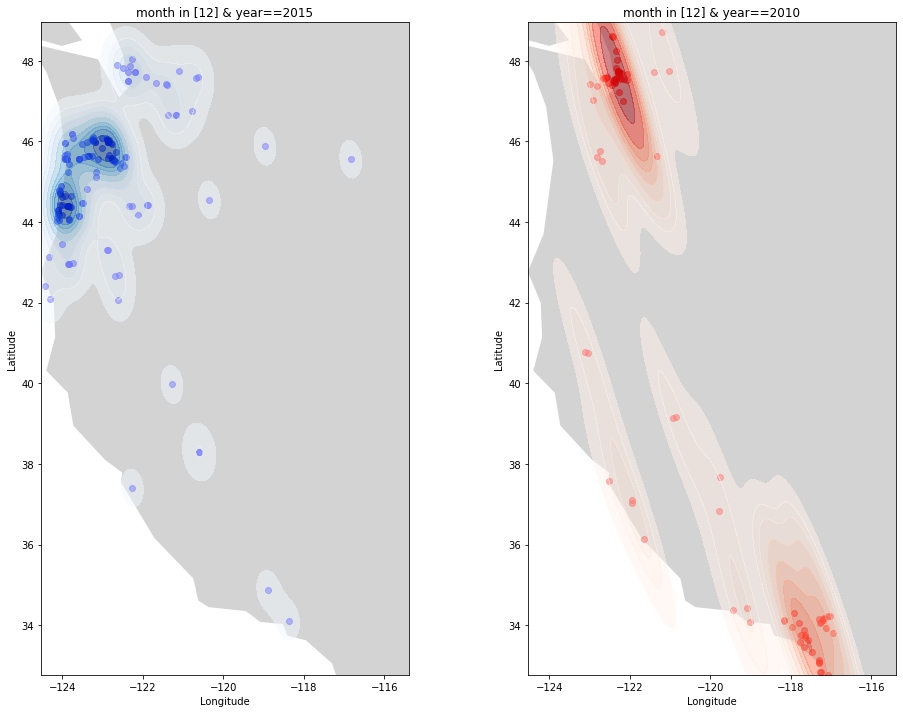

In [253]:
fig, axs =  plt.subplots(nrows=1, ncols = 2, sharex = True, gridspec_kw = {'hspace':0, 'height_ratios': None}, figsize = (16,12))

x,y = plot_selection(axs[0], query="month in [12] & year==2015", color='b')
x,y = plot_selection(axs[1], query="month in [12] & year==2010", color='r', cmap = 'Reds', plot_earth = True)

<AxesSubplot:>

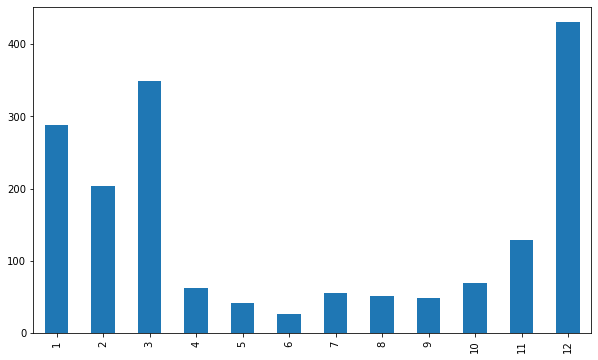

In [254]:
df_us.month.value_counts().sort_index().plot(kind='bar', figsize=(10, 6))

# KDE model (sklearn)

## check the mixture of different month's KDE -> predict probability of each month

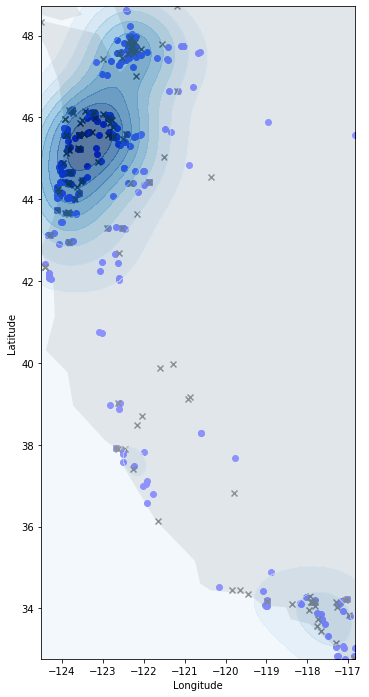

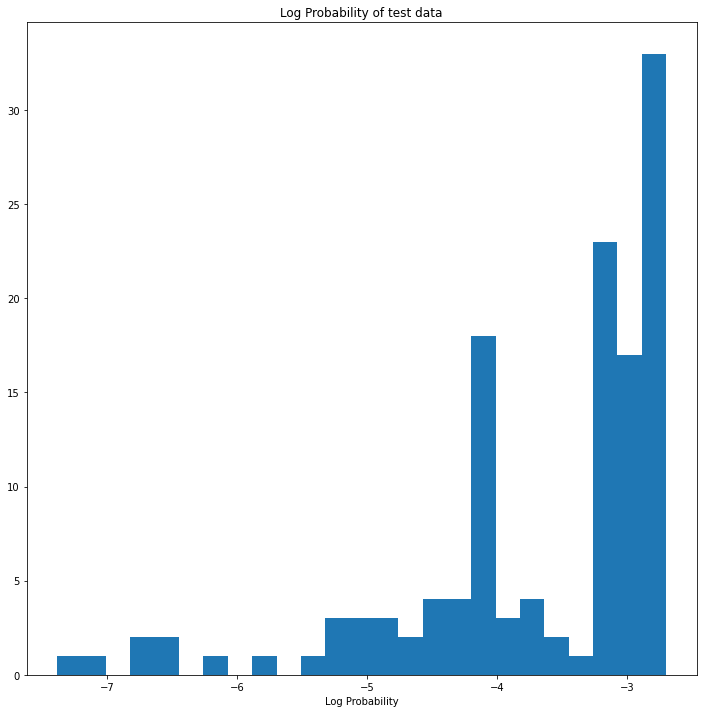

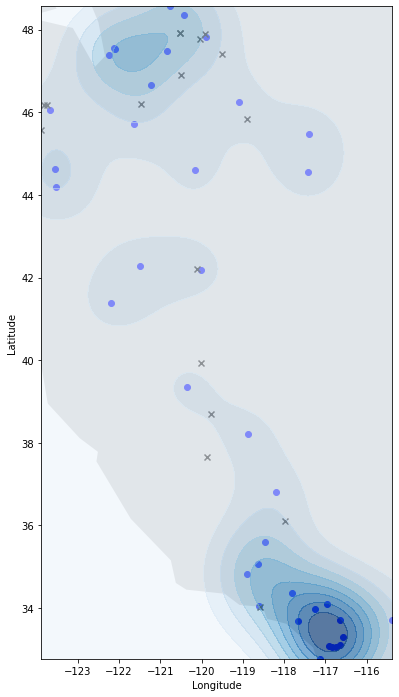

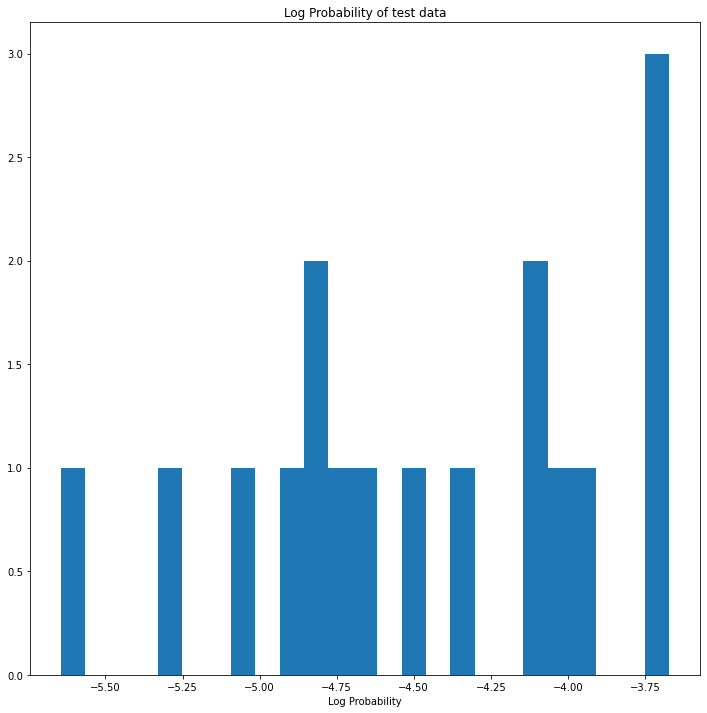

In [236]:
def asses_kde(df, plot = True, **kde_kwargs):

    df_train, df_test = sklearn.model_selection.train_test_split(df, test_size=0.3)

    x = df_train['longitude']
    y = df_train['latitude']

    X = np.vstack([x, y]).T
    kde = KernelDensity(**kde_kwargs).fit(X)

    x_val = df_test['longitude']
    y_val = df_test['latitude']
    X_val = np.vstack([x_val, y_val]).T

    logprob = kde.score_samples(X_val)
    #prob = np.exp(logprob)

    if plot:
        fig,  ax =  plt.subplots( figsize = (12,12))
        worldmap.plot(color="lightgrey", ax=ax,)

        min_lon, min_lat, max_lon, max_lat = df['longitude'].min(), df['latitude'].min(), df['longitude'].max(), df['latitude'].max()
        ax.set_xlim(min_lon, max_lon)
        ax.set_ylim(min_lat, max_lat)
        ax.set_xlabel("Longitude")
        ax.set_ylabel("Latitude")
        color = 'b'
        cmap = 'Blues'

        ax.scatter(x, y, color=color, alpha=1, label = 'train')
        ax.scatter(x_val, y_val, color='k', alpha=1, marker = 'x', label = 'test')
        #sns.kdeplot(x, y, shade=True, shade_lowest=False, cmap=cmap, alpha=0.5, ax = ax, bw_adjust = 0.5)

        xgrid = np.linspace(min_lon, max_lon, 500)
        ygrid = np.linspace(min_lat, max_lat, 500)

        X, Y = np.meshgrid(xgrid, ygrid)
        
        Z = np.exp(kde.score_samples(np.vstack([X.ravel(), Y.ravel()]).T))
        Z = Z.reshape((500, 500))
        levels = np.linspace(0, Z.max(), 10)
        ax.contourf(X, Y, Z, levels=levels, cmap=cmap, alpha = 0.6)

        fig,  ax =  plt.subplots( figsize = (12,12))
        ax.hist(logprob, bins = 25)
        ax.set_title("Log Probability of test data")
        ax.set_xlabel("Log Probability")


    return kde

kde = asses_kde(df_us.query("month in [12]"), plot = True, bandwidth = 0.8)
kde = asses_kde(df_us.query("month in [7]"), plot = True, bandwidth = 0.8)

In [241]:
rainfalldata = pd.read_csv('data/us_landslide_weather.csv')
rainfalldata['weather'].iloc[0]


'[[-0.9, -2.8, 3.9, 6.1, 279.0, 121.0, 22.3, nan, nan, nan], [1.4, 0.6, 2.8, 3.8, 254.0, nan, 9.7, nan, nan, nan], [2.5, 0.6, 5.0, 3.3, 254.0, nan, 12.6, nan, 1018.6, nan], [7.4, 4.4, 10.0, 5.3, 178.0, 194.0, 20.2, nan, 1013.0, nan], [7.9, 3.9, 12.2, 2.5, 25.0, nan, 12.6, nan, 1014.1, nan], [5.0, 3.3, 7.8, 17.3, 0.0, nan, 16.6, nan, 1016.7, nan], [4.5, 2.8, 6.1, 3.6, 0.0, nan, 10.8, nan, 1023.9, nan], [6.2, 2.8, 7.8, 1.8, 0.0, nan, 15.8, nan, 1020.0, nan], [8.2, 5.0, 11.1, 63.2, 0.0, 203.0, 13.3, nan, 1006.4, nan], [3.1, 0.6, 6.1, 19.3, 0.0, nan, 7.9, nan, 1010.3, nan]]'

In [243]:
rainfalldata['weather'].iloc[0]

'[[-0.9, -2.8, 3.9, 6.1, 279.0, 121.0, 22.3, nan, nan, nan], [1.4, 0.6, 2.8, 3.8, 254.0, nan, 9.7, nan, nan, nan], [2.5, 0.6, 5.0, 3.3, 254.0, nan, 12.6, nan, 1018.6, nan], [7.4, 4.4, 10.0, 5.3, 178.0, 194.0, 20.2, nan, 1013.0, nan], [7.9, 3.9, 12.2, 2.5, 25.0, nan, 12.6, nan, 1014.1, nan], [5.0, 3.3, 7.8, 17.3, 0.0, nan, 16.6, nan, 1016.7, nan], [4.5, 2.8, 6.1, 3.6, 0.0, nan, 10.8, nan, 1023.9, nan], [6.2, 2.8, 7.8, 1.8, 0.0, nan, 15.8, nan, 1020.0, nan], [8.2, 5.0, 11.1, 63.2, 0.0, 203.0, 13.3, nan, 1006.4, nan], [3.1, 0.6, 6.1, 19.3, 0.0, nan, 7.9, nan, 1010.3, nan]]'

In [247]:
rainfalldata_yearly = pd.read_csv('data/us_landslide_past_5_years.csv')
#rainfalldata['weather'].iloc[0]
rainfalldata_yearly['pastYears'].iloc[0]


'[[7.4, 3.9, 10.9, 100.0, 14.9, 1016.7, nan], [10.8, 5.9, 15.8, 39.0, 12.0, 1021.1, nan], [13.5, 7.5, 19.6, 26.0, 10.4, 1018.6, 0.0], [15.7, 11.0, 20.3, 45.0, 9.8, 1016.9, nan], [18.6, 12.9, 24.3, 32.0, 11.3, 1017.3, nan], [22.0, 15.5, 28.6, 1.0, 10.9, 1016.0, nan], [22.0, 16.0, 27.9, 68.0, 11.5, 1015.2, nan], [17.2, 12.7, 21.8, 26.0, 9.5, 1016.8, nan], [13.6, 9.4, 17.8, 85.0, 9.6, 1014.3, nan], [7.7, 4.3, 11.2, 61.0, 8.2, 1024.2, nan], [6.3, 3.6, 9.0, 99.0, 11.6, 1018.7, nan], [5.4, 2.2, 8.6, 50.0, 14.3, 1017.7, nan], [6.5, 0.8, 12.1, 33.0, 10.1, 1019.3, nan], [10.1, 4.6, 15.6, 96.0, 10.3, 1016.8, nan], [11.4, 7.0, 15.8, 89.0, 10.7, 1017.1, nan], [15.7, 11.1, 20.3, 110.0, 10.6, 1014.8, nan], [16.7, 12.1, 21.3, 57.0, 10.3, 1014.8, nan], [21.3, 15.1, 27.5, 10.0, 11.9, 1016.5, nan], [21.6, 14.6, 28.5, 27.0, 11.2, 1016.3, nan], [17.0, 10.9, 23.0, 43.0, 10.1, 1018.0, nan], [13.6, 10.1, 17.0, 87.0, 9.1, 1016.8, nan], [6.7, 2.9, 10.6, 127.0, 11.3, 1020.4, nan], [4.3, 1.8, 6.8, 191.0, 19.1, 1